In [47]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import marketing.csv with date columns
marketing = pd.read_csv('data/marketing.csv', parse_dates=['date_served','date_subscribed', 'date_canceled'])

# Add a DoW column
marketing['DoW'] = marketing['date_subscribed'].dt.dayofweek

/var/folders/lg/fsm8s9v909b1k6v2b54vczfw0000gn/T/ipykernel_17504/3847707924.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  marketing = pd.read_csv('data/marketing.csv', parse_dates=['date_served','date_subscribed', 'date_canceled'])
/var/folders/lg/fsm8s9v909b1k6v2b54vczfw0000gn/T/ipykernel_17504/3847707924.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  marketing = pd.read_csv('data/marketing.csv', parse_dates=['date_served','date_subscribed', 'date_canceled'])
/var/folders/lg/fsm8s9v909b1k6v2b54vczfw0000gn/T/ipykernel_17504/3847707924.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, ple

In [19]:
# Initial check such as data type, missing vals, total rows
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              10037 non-null  object        
 1   date_served          10021 non-null  datetime64[ns]
 2   marketing_channel    10022 non-null  object        
 3   variant              10037 non-null  object        
 4   converted            10022 non-null  object        
 5   language_displayed   10037 non-null  object        
 6   language_preferred   10037 non-null  object        
 7   age_group            10037 non-null  object        
 8   date_subscribed      1856 non-null   datetime64[ns]
 9   date_canceled        577 non-null    datetime64[ns]
 10  subscribing_channel  1856 non-null   object        
 11  is_retained          1856 non-null   object        
 12  DoW                  1856 non-null   float64       
dtypes: datetime64[ns](3), float64(1

In [21]:
# Initial check summary statistic every columns or features 
marketing.describe(include='all')

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,DoW
count,10037,10021,10022,10037,10022,10037,10037,10037,1856,577,1856,1856,1856.000000
unique,7309,NaN,5,2,2,4,4,7,NaN,NaN,5,2,NaN
top,a100000882,NaN,House Ads,control,False,English,English,19-24 years,NaN,NaN,Instagram,True,NaN
freq,12,NaN,4733,5091,8946,9793,9275,1682,NaN,NaN,600,1279,NaN
mean,NaN,2018-01-15 05:02:03.221235712,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-14 02:04:08.275862016,2018-03-03 18:28:04.575389952,NaN,NaN,2.529634
min,NaN,2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01 00:00:00,2018-01-05 00:00:00,NaN,NaN,0.000000
25%,NaN,2018-01-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-07 00:00:00,2018-02-07 00:00:00,NaN,NaN,1.000000
50%,NaN,2018-01-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-15 00:00:00,2018-03-04 00:00:00,NaN,NaN,2.000000
75%,NaN,2018-01-22 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-19 00:00:00,2018-04-01 00:00:00,NaN,NaN,4.000000
max,NaN,2018-01-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-31 00:00:00,2018-05-09 00:00:00,NaN,NaN,6.000000


In [22]:
# Mapping for channels
channel_dict = {"House Ads": 1, "Instagram": 2, 
                "Facebook": 3, "Email": 4, "Push": 5}

# Map the channel to a channel code
marketing['channel_code'] = marketing['subscribing_channel'].map(channel_dict)

In [23]:
# Group by date_served and count number of unique user_id's
daily_users = marketing.groupby(['date_served'])['user_id'].nunique()

# Print head of daily_users
print(daily_users.head())

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
Name: user_id, dtype: int64


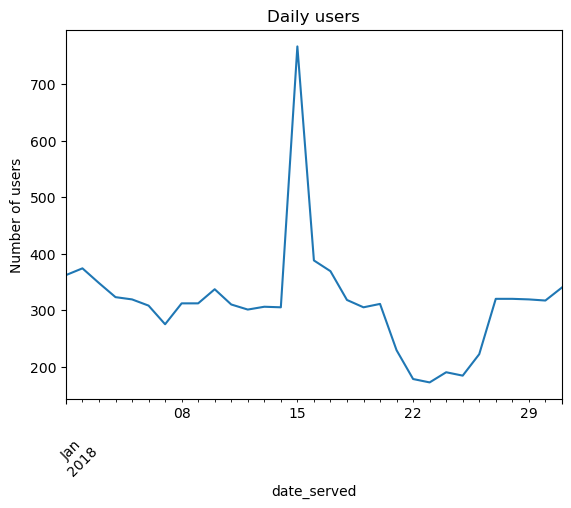

In [24]:
# Plot daily_users
daily_users.plot()

# Include a title and y-axis label
plt.title('Daily users')
plt.ylabel('Number of users')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Display the plot
plt.show()

**EDA**

In [25]:
# Calculate the number of people we marketed to
total = marketing['user_id'].nunique()

# Calculate the number of people who subscribed
subscribers = marketing[marketing['converted']==True]['user_id'].nunique()

# Calculate the conversion rate
conversion_rate = subscribers/total
print(round(conversion_rate*100, 2), "%")

13.89 %


In [26]:
# Calculate the number of subscribers
total_subscribers = marketing[marketing['converted']==True]['user_id'].nunique()

# Calculate the number of people who remained subscribed
retained = marketing[marketing['is_retained']==True]['user_id'].nunique()

# Calculate the retention rate
retention_rate = retained/total_subscribers
print(round(retention_rate*100, 2), "%")

66.8 %


In [27]:
# Isolate english speakers
english_speakers = marketing[marketing['language_displayed'] == 'English']

# Calculate the total number of English speaking users
total = english_speakers['user_id'].nunique()

# Calculate the number of English speakers who converted
subscribers = english_speakers[english_speakers['converted'] == True]['user_id'].nunique()

# Calculate conversion rate
conversion_rate = subscribers/total
print('English speaker conversion rate:', round(conversion_rate*100,2), '%')

English speaker conversion rate: 12.92 %


In [28]:
# Group by language_displayed and count unique users
total = marketing.groupby(['language_displayed'])['user_id'].nunique()

# Group by language_displayed and count unique conversions
subscribers = marketing[marketing['converted'] == True ].groupby(['language_displayed'])['user_id'].nunique()

# Calculate the conversion rate for all languages
language_conversion_rate = subscribers/total
print(language_conversion_rate)

language_displayed
Arabic     0.500000
English    0.129167
German     0.716216
Spanish    0.200000
Name: user_id, dtype: float64


In [29]:
# Group by date_served and count unique users
total = marketing.groupby(['date_served'])['user_id'].nunique()

# Group by date_served and count unique converted users
subscribers = marketing[marketing['converted'] == True].groupby(['date_served'])['user_id'].nunique()

# Calculate the conversion rate per day
daily_conversion_rate = subscribers/total
print(daily_conversion_rate)

date_served
2018-01-01    0.099448
2018-01-02    0.098930
2018-01-03    0.103448
2018-01-04    0.108359
2018-01-05    0.125392
2018-01-06    0.113636
2018-01-07    0.141818
2018-01-08    0.115385
2018-01-09    0.125000
2018-01-10    0.118694
2018-01-11    0.080645
2018-01-12    0.076412
2018-01-13    0.084967
2018-01-14    0.085246
2018-01-15    0.113429
2018-01-16    0.255155
2018-01-17    0.219512
2018-01-18    0.091195
2018-01-19    0.059016
2018-01-20    0.067524
2018-01-21    0.087336
2018-01-22    0.123596
2018-01-23    0.122093
2018-01-24    0.115789
2018-01-25    0.125000
2018-01-26    0.090090
2018-01-27    0.065625
2018-01-28    0.062500
2018-01-29    0.059561
2018-01-30    0.066246
2018-01-31    0.052941
Name: user_id, dtype: float64


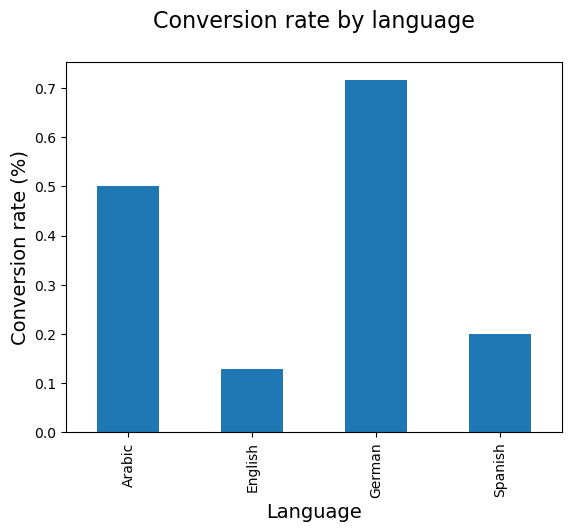

In [30]:
# Create a bar chart using language_conversion_rate DataFrame
language_conversion_rate.plot(kind='bar')

# Add a title and x and y-axis labels
plt.title('Conversion rate by language\n', size = 16)
plt.xlabel('Language', size = 14)
plt.ylabel('Conversion rate (%)', size = 14)

# Display the plot
plt.show()

In [31]:
# Group by date_served and count unique users
total = marketing.groupby(['date_served'])['user_id']\
                     .nunique()

# Group by date_served and calculate subscribers
subscribers = marketing[marketing['converted'] == True]\
                         .groupby(['date_served'])\
                         ['user_id'].nunique()

# Calculate the conversion rate for all languages
daily_conversion_rates = subscribers/total

In [32]:
# Reset index to turn the results into a DataFrame
daily_conversion_rate = pd.DataFrame(daily_conversion_rates.reset_index(drop=False))

# Rename columns
daily_conversion_rate.columns = ['date_served','conversion_rate']

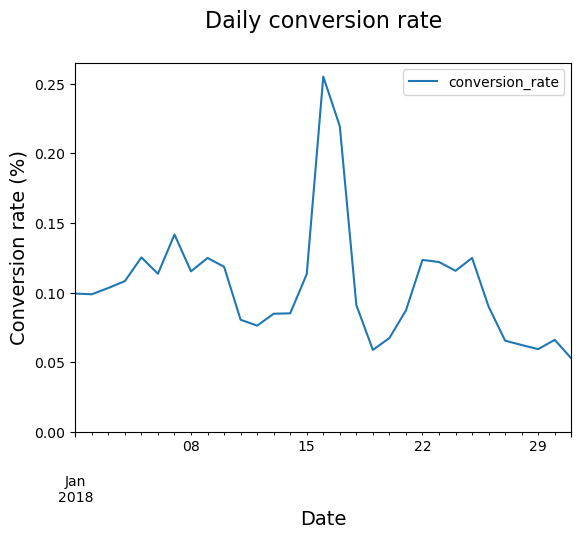

In [33]:
# Create a line chart using daily_conversion_rate
daily_conversion_rate.plot('date_served','conversion_rate')

plt.title('Daily conversion rate\n', size = 16)
plt.ylabel('Conversion rate (%)', size = 14)
plt.xlabel('Date', size = 14)

# Set the y-axis to begin at 0
plt.ylim(0)

# Display the plot
plt.show()

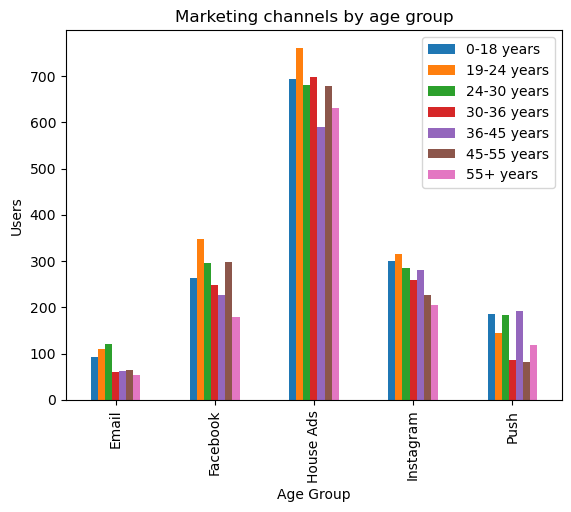

In [34]:
channel_age = marketing.groupby(['marketing_channel', 'age_group'])\
                                ['user_id'].count()

# Unstack channel_age and transform it into a DataFrame
channel_age_df = pd.DataFrame(channel_age.unstack(level = 1))

# Plot channel_age
channel_age_df.plot(kind = 'bar')
plt.title('Marketing channels by age group')
plt.xlabel('Age Group')
plt.ylabel('Users')
# Add a legend to the plot
plt.legend(loc = 'upper right', 
           labels = channel_age_df.columns.values)
plt.show()

In [37]:
# Count the subs by subscribing channel and day
retention_total = marketing.groupby(['date_subscribed',
                                     'subscribing_channel'])['user_id'].nunique()

# Print results
print(retention_total.head())

# Sum the retained subs by subscribing channel and date subscribed
retention_subs = marketing[marketing['is_retained'] == True].groupby(['date_subscribed','subscribing_channel'])['user_id'].nunique()

# Print results
print(retention_subs.head())

date_subscribed  subscribing_channel
2018-01-01       Email                   1
                 Facebook                8
                 House Ads              16
                 Instagram               8
                 Push                    3
Name: user_id, dtype: int64
date_subscribed  subscribing_channel
2018-01-01       Email                   1
                 Facebook                7
                 House Ads              11
                 Instagram               6
                 Push                    3
Name: user_id, dtype: int64


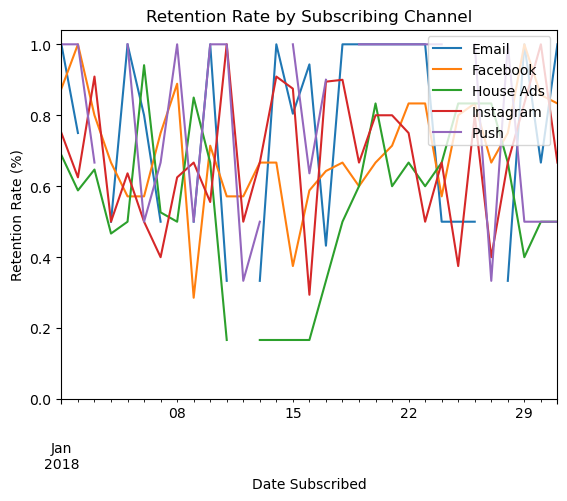

In [38]:
# Divide retained subscribers by total subscribers
retention_rate = retention_subs/retention_total
retention_rate_df = pd.DataFrame(retention_rate.unstack(level=1))

# Plot retention rate
retention_rate_df.plot()

# Add a title, x-label, y-label, legend and display the plot
plt.title('Retention Rate by Subscribing Channel')
plt.xlabel('Date Subscribed')
plt.ylabel('Retention Rate (%)')
plt.legend(loc='upper right', labels=retention_rate_df.columns.values)
plt.ylim(0)
plt.show()

**Conversion Attribution**

In [39]:
def conversion_rate(dataframe, column_names):
    # Total number of converted users
    column_conv = dataframe[dataframe['converted'] == True].groupby(column_names)['user_id'].nunique()

    # Total number users
    column_total = dataframe.groupby(column_names)['user_id'].nunique()
    
    # Conversion rate 
    conversion_rate = column_conv/column_total
    
    # Fill missing values with 0
    conversion_rate = conversion_rate.fillna(0)
    return conversion_rate

date_served  age_group  
2018-01-01   0-18 years     0.155172
             19-24 years    0.196721
             24-30 years    0.105263
             30-36 years    0.040816
             36-45 years    0.042553
                              ...   
2018-01-31   24-30 years    0.057692
             30-36 years    0.000000
             36-45 years    0.035088
             45-55 years    0.023256
             55+ years      0.026316
Name: user_id, Length: 217, dtype: float64


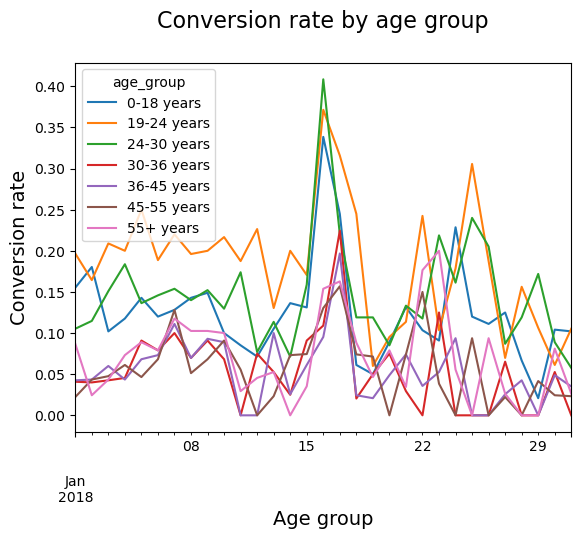

In [40]:
# Calculate conversion rate by age_group
age_group_conv = conversion_rate(marketing, ['date_served', 'age_group'])
print(age_group_conv)

# Unstack and create a DataFrame
age_group_df = pd.DataFrame(age_group_conv.unstack(level=1))

# Visualize conversion by age_group
age_group_df.plot()
plt.title('Conversion rate by age group\n', size = 16)
plt.ylabel('Conversion rate', size = 14)
plt.xlabel('Age group', size = 14)
plt.show()

In [41]:
def plotting_conv(dataframe):
    for column in dataframe:
        # Plot column by dataframe's index
        plt.plot(dataframe.index, dataframe[column])
        plt.title('Daily ' + str(column) + ' conversion rate\n', 
                  size = 16)
        plt.ylabel('Conversion rate', size = 14)
        plt.xlabel('Date', size = 14)
        # Show plot
        plt.show()  
        plt.clf()

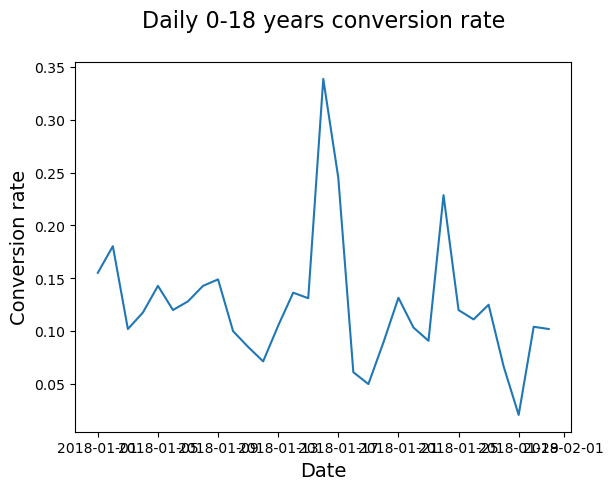

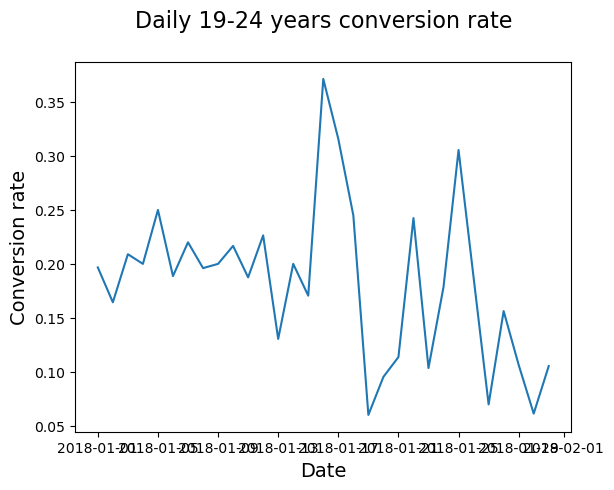

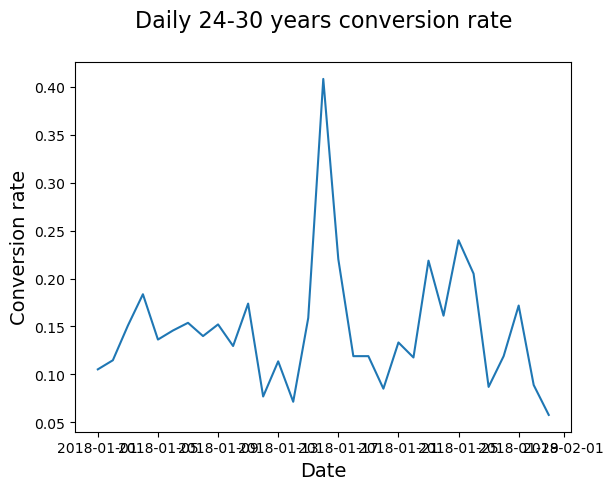

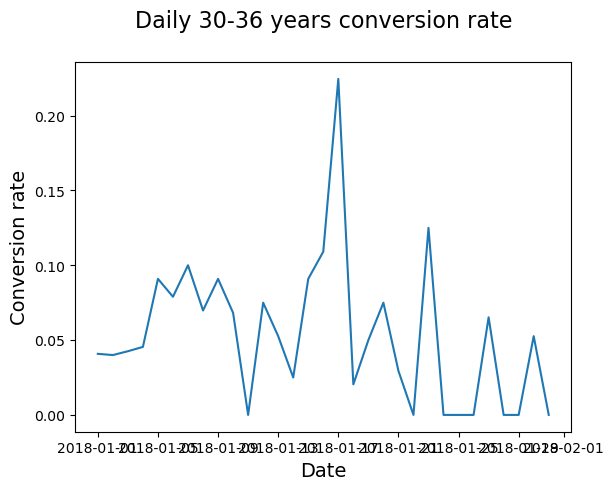

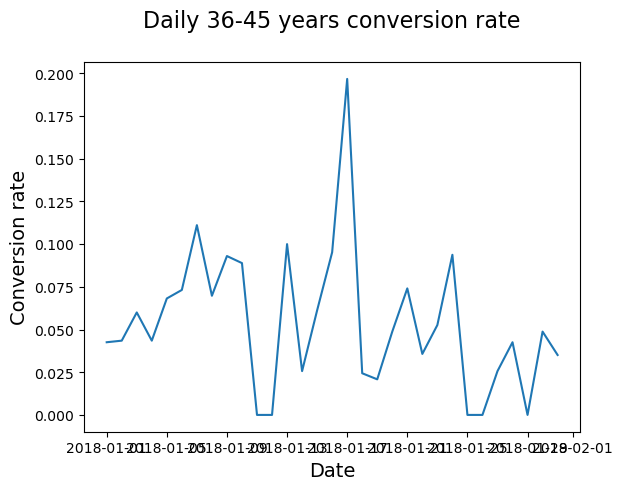

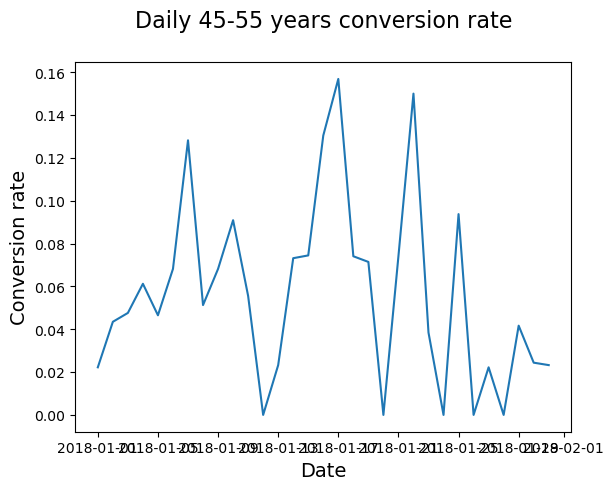

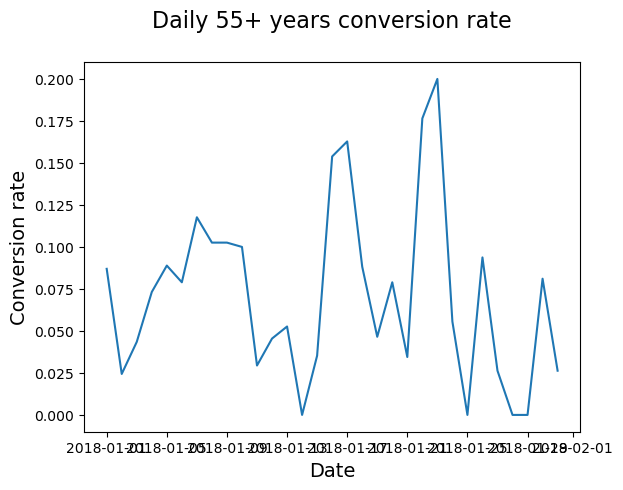

<Figure size 640x480 with 0 Axes>

In [42]:
# Calculate conversion rate by date served and age group
age_group_conv = conversion_rate(marketing, ['date_served', 'age_group'])

# Unstack age_group_conv and create a DataFrame
age_group_df = pd.DataFrame(age_group_conv.unstack(level=1))

# Plot the results
plotting_conv(age_group_df)

In [43]:
# Calculate conversion rate by date served and channel
daily_conv_channel = conversion_rate(marketing, ['date_served', 'marketing_channel'])

print(daily_conv_channel.head())

date_served  marketing_channel
2018-01-01   Email                1.000000
             Facebook             0.117647
             House Ads            0.084656
             Instagram            0.106667
             Push                 0.083333
Name: user_id, dtype: float64


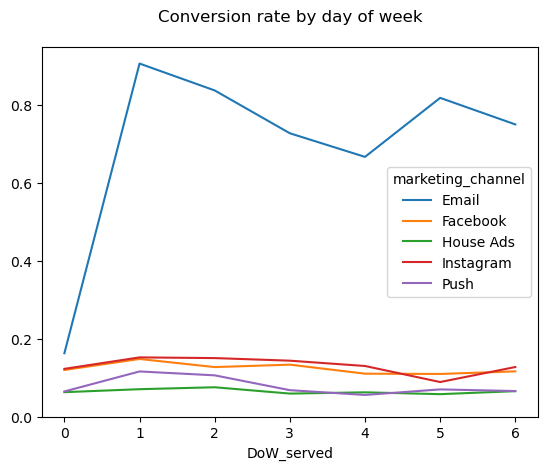

In [44]:
# Add day of week column to marketing
marketing['DoW_served'] = pd.to_datetime(marketing['date_served']).dt.dayofweek

# Calculate conversion rate by day of week
DoW_conversion = conversion_rate(marketing, ['DoW_served', 'marketing_channel'])


# Unstack channels
DoW_df = pd.DataFrame(DoW_conversion.unstack(level=1))

# Plot conversion rate by day of week
DoW_df.plot()
plt.title('Conversion rate by day of week\n')
plt.ylim(0)
plt.show()

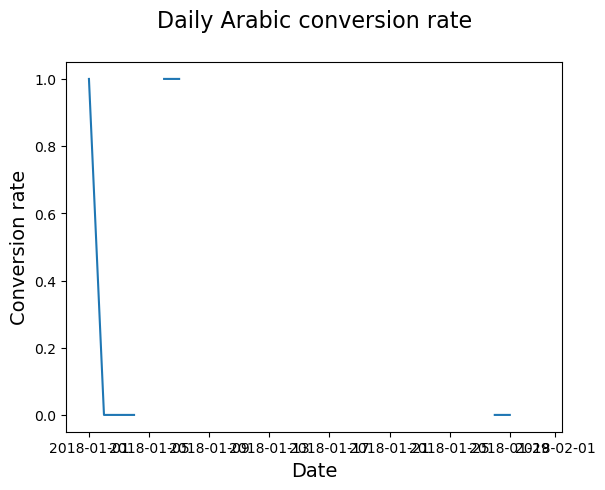

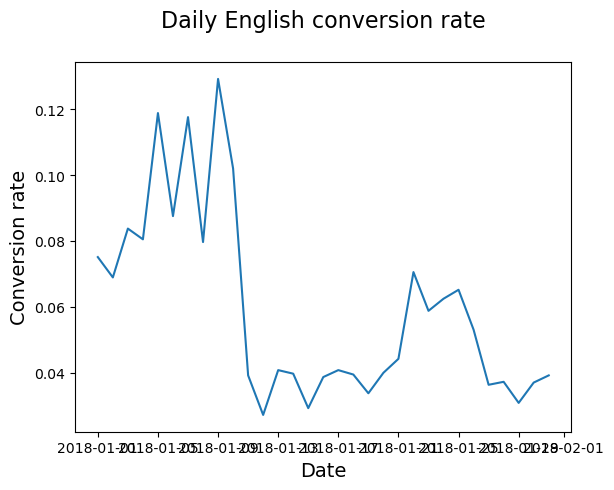

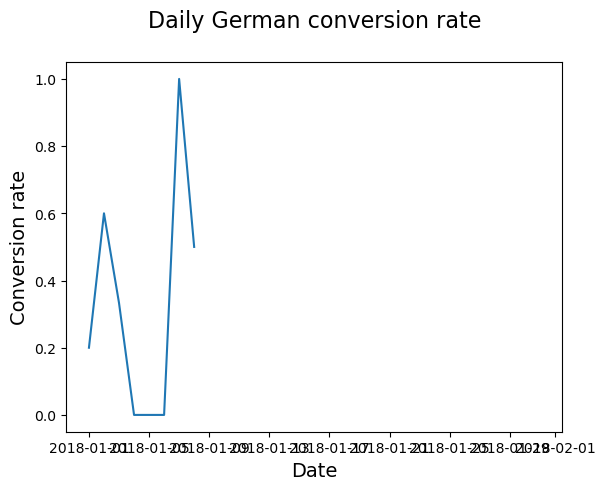

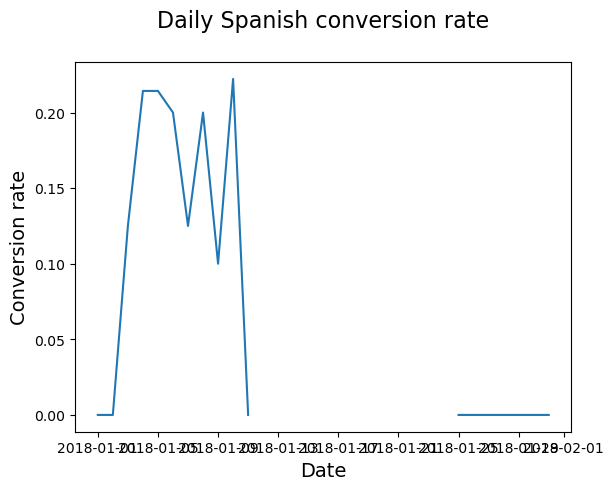

<Figure size 640x480 with 0 Axes>

In [45]:
# Isolate the rows where marketing channel is House Ads
house_ads = marketing[marketing['marketing_channel'] == 'House Ads']

# Calculate conversion by date served, and language displayed
conv_lang_channel = conversion_rate(house_ads, ['date_served', 'language_displayed'])

# Unstack conv_lang_channel
conv_lang_df = pd.DataFrame(conv_lang_channel.unstack(level=1))

# Use your plotting function to display results
plotting_conv(conv_lang_df)

In [48]:
# Add the new column is_correct_lang
house_ads['is_correct_lang'] = np.where(
    house_ads['language_displayed'] == house_ads['language_preferred'], 
    'Yes', 
    'No')

# Groupby date_served and correct_language
language_check = house_ads.groupby(['date_served', 'is_correct_lang'])['user_id'].count()

# Unstack language_check and fill missing values with 0's
language_check_df = pd.DataFrame(language_check.unstack(level=1)).fillna(0)

# Print results
print(language_check_df)

is_correct_lang    No    Yes
date_served                 
2018-01-01        2.0  189.0
2018-01-02        3.0  247.0
2018-01-03        0.0  220.0
2018-01-04        0.0  168.0
2018-01-05        0.0  160.0
2018-01-06        1.0  151.0
2018-01-07        2.0  130.0
2018-01-08        0.0  154.0
2018-01-09        0.0  157.0
2018-01-10        0.0  170.0
2018-01-11       20.0  135.0
2018-01-12       18.0  130.0
2018-01-13       26.0  122.0
2018-01-14       20.0  131.0
2018-01-15       16.0  192.0
2018-01-16       28.0  127.0
2018-01-17       21.0  127.0
2018-01-18       31.0  121.0
2018-01-19       22.0  127.0
2018-01-20       28.0  124.0
2018-01-21       14.0  100.0
2018-01-22       13.0   72.0
2018-01-23       16.0   69.0
2018-01-24       13.0   83.0
2018-01-25       19.0   74.0
2018-01-26       24.0   92.0
2018-01-27       18.0  149.0
2018-01-28       28.0  136.0
2018-01-29       24.0  142.0
2018-01-30       23.0  145.0
2018-01-31       23.0  135.0


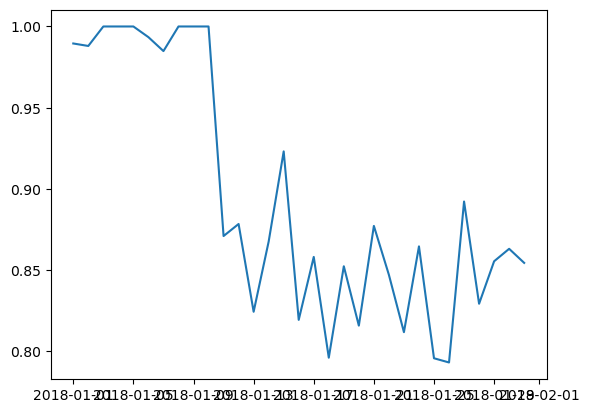

<Figure size 640x480 with 0 Axes>

In [49]:
# Divide the count where language is correct by the row sum
language_check_df['pct'] = language_check_df.Yes/language_check_df.sum(axis=1)

# Plot and show your results
plt.plot(language_check_df.index.values, language_check_df.pct)
plt.show()
plt.clf()

In [50]:
# Calculate pre-error conversion rate
house_ads_bug = house_ads[house_ads['date_served'] < '2018-01-11']
lang_conv = conversion_rate(house_ads_bug,'language_displayed')

# Index other language conversion rate against English
spanish_index = lang_conv['Spanish']/lang_conv['English']
arabic_index = lang_conv['Arabic']/lang_conv['English']
german_index = lang_conv['German']/lang_conv['English']

print("Spanish index:", spanish_index)
print("Arabic index:", arabic_index)
print("German index:", german_index)

Spanish index: 1.681924882629108
Arabic index: 5.045774647887324
German index: 4.485133020344287


In [51]:
# Group house_ads by date and language
converted = house_ads.groupby(['date_served','language_preferred'])\
                        .agg({'user_id':'nunique',
                              'converted':'sum'})

# Unstack converted
converted_df = pd.DataFrame(converted.unstack(level=1))

In [54]:
converted.head()

user_id converted
date_served language_preferred                   
2018-01-01  Arabic                    2         2
            English                 171        13
            German                    5         1
            Spanish                  11         0
2018-01-02  Arabic                    3         0